Churn Data <br>
21 Columns (15 categorical data) 5561 rows <br>
majority(0) : miniority class(1) = 7:3 <br>
missing data : about 6% <br>
Goal : Predict whether the customer is churn or not <br>
Evaluation Metric: F1 <br>
Reason: I want to predict the class labels and I think the positive class which is churn(1) is more important.
And both Precision and Recall are equal important as it dependents on company's decision how to maintain the customers.Some company may want to focus on not churn(0) groups, some may also pay attention to the churn(1) group. So I think both precision and recall are equal important and I used F1 socre.

# Result
- Best model: XGBoost
- Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
- Best Mean Cross Validation Score is 0.6052890929449943
- Train score is 0.664461247637051
- Test score is 0.5899814471243043

In [155]:
pred_y=xgbc_grid.predict(X_test)

In [154]:
for i in pred_y:
    print(i,end='')

0000000001110000000000000011010010001000000000010010011010001010000000100010001000000011000010000000000000100000101000010000000011000010100010000000000100000001000000000010100100010000010001000100100100000010001000001000100011100000000010000001000100000100001101000010010000010000101000001001000000010001000100000100001000000010000100000000100000011001101001000000010000000000101000100010010000000010001000011010000100000001001000100000000011000100000000000011000001000101011000110000010100010100010001100000010000000001000100000000000010100000011011010000000010100000100011000100000110000000000010010001000000110000000000000010000000000000001000110000110100100000100000000110000010110010001000000000011000001010000000001000000001010110010011000101100000100011101100000010000010011000100000000000000100000110100000101100001000001001011100000010000010000110000001000000011000100000100100001000011000000000000011000100101001000000000011000000110000000100010000000010100100000100000001000000001000110000

# Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [3]:
data=data.drop('customerID', axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 0 to 5560
Data columns (total 20 columns):
gender              5561 non-null object
SeniorCitizen       5561 non-null int64
Partner             5561 non-null object
Dependents          5330 non-null object
tenure              5439 non-null float64
PhoneService        5561 non-null object
MultipleLines       5561 non-null object
InternetService     5561 non-null object
OnlineSecurity      5561 non-null object
OnlineBackup        5561 non-null object
DeviceProtection    5561 non-null object
TechSupport         5561 non-null object
StreamingTV         5561 non-null object
StreamingMovies     5561 non-null object
Contract            5561 non-null object
PaperlessBilling    5561 non-null object
PaymentMethod       5561 non-null object
MonthlyCharges      5561 non-null float64
TotalCharges        5561 non-null float64
Churn               5561 non-null int64
dtypes: float64(3), int64(2), object(15)
memory usage: 869.0+ KB


In [5]:
for var in data.columns:
    print(var,data[var].nunique(),'\n', data[var].unique()[0:20], '\n')

gender 2 
 ['Female' 'Male'] 

SeniorCitizen 2 
 [0 1] 

Partner 2 
 ['Yes' 'No'] 

Dependents 2 
 ['No' 'Yes' nan] 

tenure 73 
 [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30.] 

PhoneService 2 
 ['No' 'Yes'] 

MultipleLines 3 
 ['No phone service' 'No' 'Yes'] 

InternetService 3 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 3 
 ['No' 'Yes' 'No internet service'] 

OnlineBackup 3 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection 3 
 ['No' 'Yes' 'No internet service'] 

TechSupport 3 
 ['No' 'Yes' 'No internet service'] 

StreamingTV 3 
 ['No' 'Yes' 'No internet service'] 

StreamingMovies 3 
 ['No' 'Yes' 'No internet service'] 

Contract 3 
 ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling 2 
 ['Yes' 'No'] 

PaymentMethod 4 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges 1477 
 [ 29.85  56.95  53.85  42.3   70.7   99.65  89.1   29.75 104.8   56.15
  49.95  18.95 100.35 103

In [6]:
data.isnull().mean()

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.041539
tenure              0.021939
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
Churn               0.000000
dtype: float64

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5561.000000,5439.000000,5561.000000,5561.000000,5561.000000
mean,0.160223,32.293988,64.933663,2261.764979,0.263082
std,0.366846,24.624928,30.098449,2262.099846,0.440346
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.700000,396.100000,0.000000
50%,0.000000,29.000000,70.450000,1380.100000,0.000000
75%,0.000000,55.000000,89.950000,3723.650000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [8]:
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Churn' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Churn' and var not in discrete]
categorical = [var for var in data.columns if data[var].dtype=='O'and var!='Churn']

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 1 discrete variables
There are 3 continuous variables
There are 15 categorical variables


In [9]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


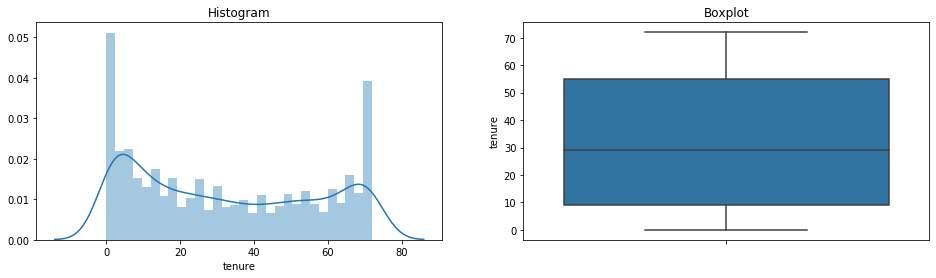

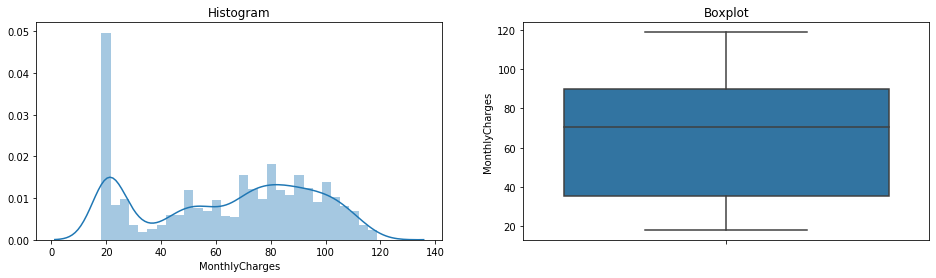

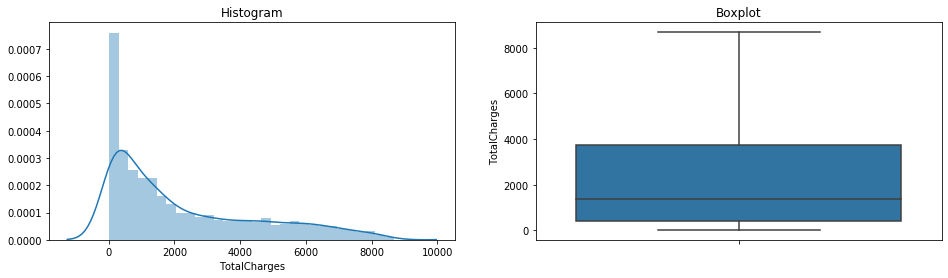

In [10]:
for var in continuous:
    diagnostic_plots(data, var)

# PreProcessing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1), data['Churn'], test_size=0.2, random_state=0)

In [12]:
print(f'Train size is {X_train.shape}' )
print(f'Test size is {X_test.shape}' )

Train size is (4448, 19)
Test size is (1113, 19)


In [13]:
from feature_engine import missing_data_imputers as mdi
from sklearn.pipeline import Pipeline
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine import categorical_encoders as ce

In [14]:
churn_pipeline = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['tenure'])),
     ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Dependents'])),

     #categorical encoding
    ('categorical_enc', ce.OrdinalCategoricalEncoder(
        encoding_method='arbitrary', variables=categorical)),

    ('yjt', YeoJohnsonTransformer(variables = ['tenure','MonthlyCharges', 'TotalCharges'])),

])

In [15]:
churn_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['tenure'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Dependents'])),
                ('categorical_enc',
                 OrdinalCategoricalEncoder(encoding_method='arbitrary',
                                           variables=['gender', 'Partner',
                                                      'Dependents',
                                                      'PhoneService',
                                                      'MultipleLines',
                                                      'InternetService',
                                                      'OnlineSecurity',
                                                      'OnlineBackup',
                                                      'DeviceProtection',
                            

In [16]:
X_train=pd.DataFrame(churn_pipeline.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(churn_pipeline.transform(X_test),columns=X_test.columns)

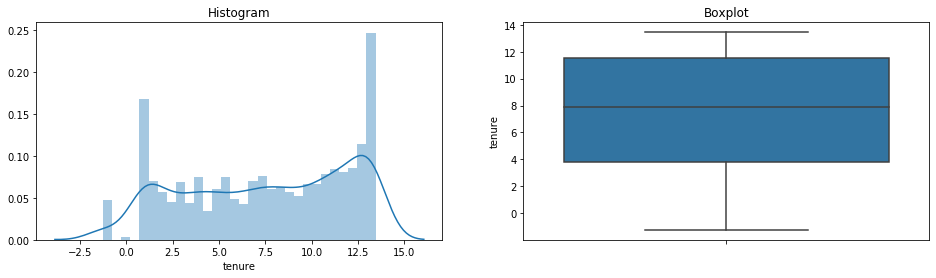

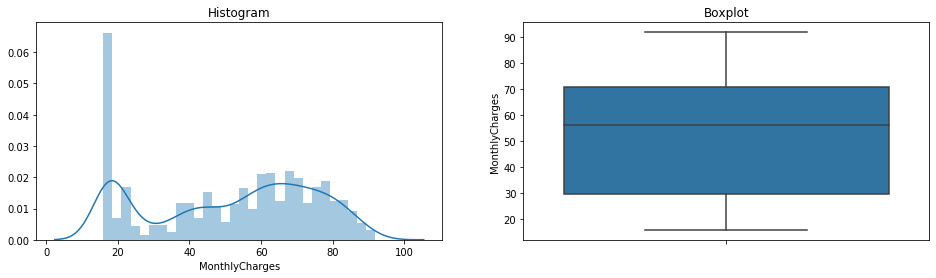

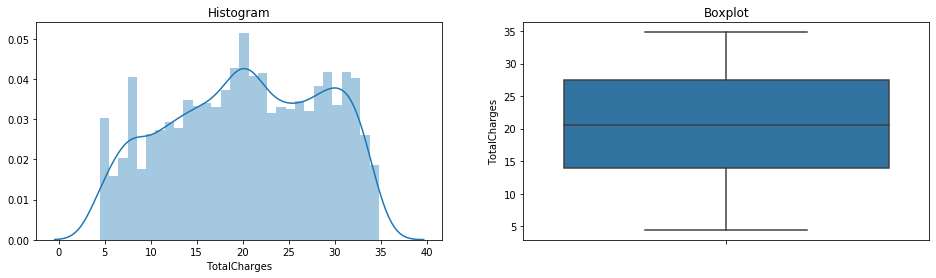

In [17]:
for var in X_train[continuous]:
    diagnostic_plots(X_train, var)

In [18]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4358,0,0,0,0,5.139470,0,0,0,0,0,0,0,0,0,0,0,0,52.075998,16.387909
1189,0,0,1,1,1.938325,0,0,1,0,0,1,0,1,0,1,1,1,67.713739,12.063969
1790,1,0,1,1,4.894620,0,0,1,0,0,0,0,1,0,1,1,2,62.074075,18.268393
624,1,0,1,1,3.481118,0,0,2,1,1,2,1,2,1,1,1,2,17.262952,9.750471
4643,0,0,1,1,1.938325,0,1,0,0,0,0,2,0,2,1,0,3,52.452776,27.278206


# Select metric for evaluation----F1

In [19]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [0]
Test score: 0.74


# Basic Algorithms 

## Naive Algorithms

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='f1')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.2657341629063238

Naive Algorithm Test Performance:  0.6307277628032345


## Logistic Regression

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

In [30]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000)
logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l2']}

logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True, scoring='f1')
logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [31]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.5614592890380571
Best Mean Cross Validation Score is {'C': 1, 'penalty': 'l2'}
Train score is 0.5692007797270955
Test score is 0.53411306042885


## Decision Tree classification

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True,scoring='f1')
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree test Performance: ", grid_dtree.score(X_test,y_test))
print("Decision Tree train Performance: ", grid_dtree.score(X_train,y_train))

Best Mean Cross-validation score: 0.54

Decision Tree parameters:  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree test Performance:  0.5441941074523396
Decision Tree train Performance:  0.5435851586946803


## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'p': [1,2], 'n_neighbors' : range(1,20), 'weights': ['uniform','distance']}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring='f1')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [34]:
print(f'Best Mean Cross Validation Score is {grid_knn.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_knn.best_params_}')
print(f'Train score is {grid_knn.score(X_train,y_train)}')
print(f'Test score is {grid_knn.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.5782491512701027
Best Mean Cross Validation Score is {'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}
Train score is 0.6284941388638413
Test score is 0.5628318584070797


## SVM

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### linear svc

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [97]:
svc_linear=SVC(kernel='linear',probability=True)
param_grid = {'C': [0.1, 1, 10,100,200,500]}
grid_svc = GridSearchCV(svc_linear, param_grid, cv=5, return_train_score=True,scoring='f1')
grid_svc.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [98]:
print(f'Best Mean Cross Validation Score is {grid_svc.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_svc.best_params_}')
print(f'Train score is {grid_svc.score(X_train_s,y_train)}')
print(f'Test score is {grid_svc.score(X_test_s,y_test)}')

Best Mean Cross Validation Score is 0.5606548673410745
Best Mean Cross Validation Score is {'C': 500}
Train score is 0.5708756652152879
Test score is 0.5472061657032755


### scv with rbf, polynomial and sigmoid kernels

In [99]:
svc_kernel = SVC(kernel = 'rbf',probability=True)

#define a list of parameters
param_svc_kernel = {'C': [1,10,50,100,150],'gamma':[0.001,0.005,0.01,0.1,1]}

#apply grid search
grid_svc_rbf = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2,scoring='f1')
grid_svc_rbf.fit(X_train, y_train)

print('train score: ', grid_svc_rbf.score(X_train, y_train))
print('test score: ', grid_svc_rbf.score(X_test, y_test))
print(grid_svc_rbf.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_rbf.best_score_))

train score:  0.6501193317422433
test score:  0.5708955223880596
{'C': 10, 'gamma': 0.01}
Best Mean Cross-validation score: 0.57


In [100]:
svc_linear=SVC(kernel='poly',probability=True)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'degree':[1,2,3]}
grid_svc_poly = GridSearchCV(svc_linear, param_grid, cv=5,scoring='f1')
grid_svc_poly.fit(X_train, y_train)
print('train score: ', grid_svc_poly.score(X_train, y_train))
print('test score: ', grid_svc_poly.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_poly.best_score_))

train score:  0.5687804878048781
test score:  0.5348837209302325
Best parameters: {'C': 100, 'degree': 1}
Best cross-validation score: 0.55


In [101]:
svc_linear=SVC(kernel='sigmoid',probability=True)
param_grid = {'C': [0.01,0.02, 0.1, 1, 10]}
grid_svc_s = GridSearchCV(svc_linear, param_grid, cv=5,scoring='f1')
grid_svc_s.fit(X_train, y_train)
print('train score: ', grid_svc_s.score(X_train, y_train))
print('test score: ', grid_svc_s.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_s.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_s.best_score_))

train score:  0.29705505761843787
test score:  0.27739726027397255
Best parameters: {'C': 10}
Best cross-validation score: 0.30


## Random forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring='f1' )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [103]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.5722867157749454
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.664756446991404
Test score is 0.5566218809980806


## Extra tree

In [104]:
from  sklearn.ensemble import ExtraTreesClassifier

In [105]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring='f1' )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [106]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.5558099172190027
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.6104023552502454
Test score is 0.5443786982248521


## GBoost

In [107]:
from  sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring='f1' )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [108]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.5708405343053444
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.684407096171802
Test score is 0.5930018416206262


## XGBoost

In [109]:
from xgboost import XGBClassifier

In [110]:
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring='f1' )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [111]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.6052890929449943
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
Train score is 0.664461247637051
Test score is 0.5899814471243043


## Summary

In [112]:
classifiers={'knn':grid_knn,
             'logreg':logreg_grid,
             'lsvc':grid_svc,
             'svc_rbf':grid_svc_rbf,
             'svc_poly':grid_svc_poly,
             'svc_sigmoid':grid_svc_s,
             'dtree':grid_dtree,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [113]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [114]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [115]:
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
10,xgbc,0.605289,0.028299
0,knn,0.578249,0.040991
7,rfc,0.572287,0.023748
9,gbc,0.570841,0.021288
3,svc_rbf,0.569952,0.040327
1,logreg,0.561459,0.023861
2,lsvc,0.560655,0.026989
8,etc,0.555810,0.035590
4,svc_poly,0.554053,0.017688
6,dtree,0.542544,0.027195


In [116]:
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [117]:
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

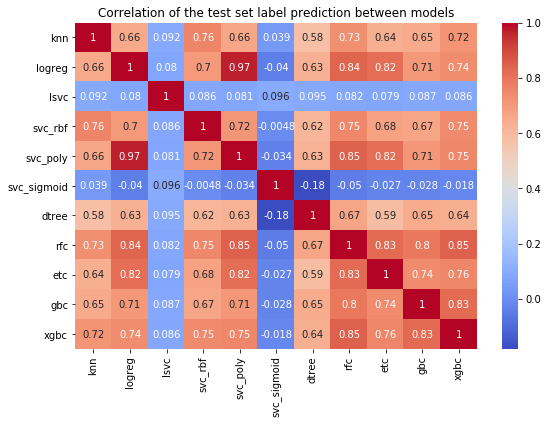

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [119]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [120]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Top Absolute Correlations
svc_rbf      svc_sigmoid    0.004819
svc_sigmoid  xgbc           0.018453
             etc            0.027370
             gbc            0.028350
svc_poly     svc_sigmoid    0.033933
dtype: float64


## Stacking

### voting top 5

In [132]:
from sklearn.ensemble import VotingClassifier

In [134]:
vclf1 = VotingClassifier(estimators=
                              [('rfc', rfc_grid.best_estimator_), 
                               ('svc_rbf',grid_svc_rbf.best_estimator_), 
                               ('knn',grid_knn.best_estimator_),
                               ('xgbc', xgbc_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True,scoring='f1'  )
vclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('rfc',
                                                     RandomForestClassifier(bootstrap=True,
                                                                            ccp_alpha=0.0,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=8,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            max_samples=None,
                                                                            min_impurity_decrease=0.0,
                                                    

In [135]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.5977173988842208
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.6698113207547169
Test score is 0.5800376647834274


### Voting Least Correlated

In [136]:
vclf3 = VotingClassifier(estimators=
                              [('svc_rbf',grid_svc_rbf.best_estimator_), 
                               ( 'svc_sigmoid',grid_svc_s.best_estimator_), 
                               ('xgbc',xgbc_grid.best_estimator_),
                              ( 'etc', etc_grid.best_estimator_)], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True,scoring='f1' )
vclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('svc_rbf',
                                                     SVC(C=10, break_ties=False,
                                                         cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3, gamma=0.01,
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=None,
                                                         shrinking=True,
                                                         tol=0.001,
  

In [137]:
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.5355638801590255
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.6019617965926691
Test score is 0.5296610169491525


### Stacking Top 5

In [138]:
from sklearn.ensemble import StackingClassifier

In [139]:
sclf1 = StackingClassifier(estimators=
                              [('rfc', rfc_grid.best_estimator_), 
                               ('svc_rbf',grid_svc_rbf.best_estimator_), 
                               ('knn',grid_knn.best_estimator_),
                               ('xgbc', xgbc_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_)
                              ], final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, scoring='f1')
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('rfc',
                                                       RandomForestClassifier(bootstrap=True,
                                                                              ccp_alpha=0.0,
                                                                              class_weight=None,
                                                                              criterion='gini',
                                                                              max_depth=8,
                                                                              max_features='auto',
                                                                              max_leaf_nodes=None,
                                                                              max_samples=None,
                                                                              min_impu

In [140]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.583538448877878
Best Mean Cross Validation Score is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.6663475347056007
Test score is 0.5675675675675677


### Stacking Least Correlated

In [141]:
sclf2 = StackingClassifier(estimators=
                               [('svc_rbf',grid_svc_rbf.best_estimator_), 
                               ( 'svc_sigmoid',grid_svc_s.best_estimator_), 
                               ('xgbc',xgbc_grid.best_estimator_),
                              ( 'etc', etc_grid.best_estimator_)], 
                           final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='f1' )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('svc_rbf',
                                                       SVC(C=10,
                                                           break_ties=False,
                                                           cache_size=200,
                                                           class_weight=None,
                                                           coef0=0.0,
                                                           decision_function_shape='ovr',
                                                           degree=3, gamma=0.01,
                                                           kernel='rbf',
                                                           max_iter=-1,
                                                           probability=True,
                                                           random_state=None,
           

In [142]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.5926197963271219
Best Mean Cross Validation Score is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.6554379210779596
Test score is 0.5796545105566219


# Cost Sensitive Algorithms

## Logistic Regression

In [121]:
logreg = LogisticRegression(solver='lbfgs')
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_logreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(grid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_logreg.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.55


## Decision Trees

In [122]:
dtree = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_dtree2= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_dtree2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_dtree2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_dtree2.best_score_))

Best parameters: {'class_weight': {0: 100, 1: 1}}
Best Mean cross-validation score: 0.50


## Support Vector Machines

In [123]:
svc = SVC()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_svc2= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_svc2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svc2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svc2.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.49


## Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model,X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean f1: %.3f' % mean(scores))

Mean f1: 0.495


## XGBoost

In [125]:
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}

#apply grid search
grid_xgboost2= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_xgboost2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_xgboost2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost2.best_score_))

Best parameters: {'scale_pos_weight': 25}
Best Mean cross-validation score: 0.59


## Extra Trees

In [126]:
etc= ExtraTreesClassifier(random_state=42)
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_etc2= GridSearchCV(etc, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_etc2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_etc2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_etc2.best_score_))

Best parameters: {'class_weight': {0: 100, 1: 1}}
Best Mean cross-validation score: 0.52


## Bagging decision tree with under sampling

In [127]:
from imblearn.ensemble import BalancedBaggingClassifier

# define model
model = BalancedBaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean f1: %.3f' % mean(scores))

Mean f1: 0.586


# Data Sampling Algorithms 

## oversampling

### without grid search

In [128]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
pipe_rand_over = Pipeline([('over', RandomOverSampler()), ('model', DecisionTreeClassifier())])
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', DecisionTreeClassifier())])
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [129]:
scores = cross_val_score(pipe_rand_over, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
score = mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.488


In [130]:
scores = cross_val_score(pipe_rand_smote,X_train, y_train,scoring='f1', cv=cv, n_jobs=-1)
score = mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.506


### with GridSearch

In [131]:
### GridSearch with oversampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', DecisionTreeClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__max_depth': [2,3,4,5,6],
}

#apply grid search
grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))

Best parameters: {'model__max_depth': 4, 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.59


## under sampling

In [143]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [144]:
pipe_rand_cnn = Pipeline([('cnn', CondensedNearestNeighbour(sampling_strategy='auto')), ('model', DecisionTreeClassifier())])
param_grid = {

    'model__max_depth': [2,3,4,5,6],
}

#apply grid search
grid_cnn= GridSearchCV(pipe_rand_cnn, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_cnn.fit(X_train, y_train)

print("Best parameters: {}".format(grid_cnn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_cnn.best_score_))

Best parameters: {'model__max_depth': 4}
Best Mean cross-validation score: 0.59
